# Question 3

(100000,)
(100000,)
(100000,)


Text(0, 0.5, 'x')

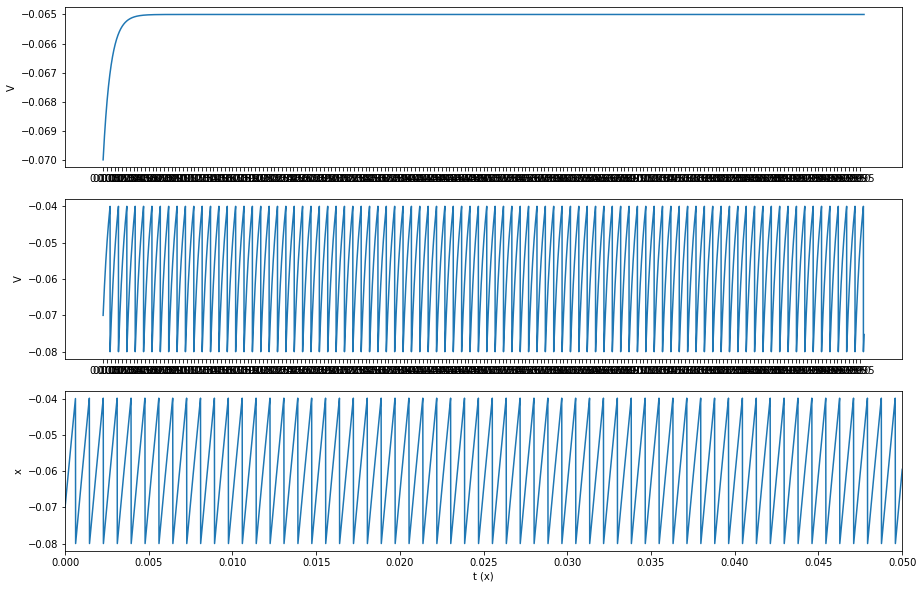

In [97]:
import numpy as np
# import matplotlib as plt
import pylab as plt
# from tqmd.notebook iport trange, tqdm_notebook as tqdm

# part 1:

# C dv/dt = - 1/Rm (Vm - Ve) + Im
# dV = dt (-1/(R) (Vm-Ve) + Im)/C

dt = 10e-6 # 10 us
t_max = 1 # seconds
t = np.arange(0, t_max, dt)


R = 50e6 # 50 MOhms Membrane Resistance
C = 200e-12 # 200 pF Membrane capacitance
Ve = -70e-3 # -70 mV Equilibrium voltage
Vreset = -80e-3 # -80 mV Hyperpolarization/reset voltage
Vth = -40e-3

def IF_Voltage(dt, R, C, Ve, Vreset, Vth, Im):
    Vm = np.zeros(t.shape)
    print(Vm.shape)
    
    Vm[0] = Ve
    # Let's figure out dV
    # dV = dt *  (-1/R * (Vm-Ve) + Im)/C
    
    for i in range(1, Vm.shape[0]):   #[0] length of it
        dV = dt * (-1/R * (Vm[i-1]-Ve) + Im)/C
        Vm[i] = Vm[i-1] + dV
        
        if Vm[i-1] >= Vth:
            Vm[i] = Vreset
            
    return Vm

Im = np.asarray([100e-12, 1e-9, 10e-9])

plt.figure(1, figsize=(15,10))
for I in range(Im.shape[0]):
    plt.subplot(3, 1, I+1)
    plt.plot(t, IF_Voltage(dt, R, C, Ve, Vreset, Vth, Im[I]))
    plt.ylabel('V')
    plt.xticks(np.arange(0, t_max, 0.005))
    
plt.xlim((0,0.05))

plt.xlabel('t (x)')
plt.ylabel('x')

---

[    0.             0.             0.             0.
     0.             0.             0.          -216.38462098
  -254.35766793  -297.62899807  -347.47961666  -405.6075958
  -474.32564512  -556.87634168  -657.95913138  -784.65826846
  -948.18088934 -1167.37221537 -1476.56440988 -1945.60527975
 -2741.81156035 -4391.08933992 -9847.43535434 66356.49675914
  8118.24875642  4470.61974388  3150.99438366  2469.81853868
  2053.99662506  1773.74413093  1572.04966289  1419.93904394
  1301.12699337  1205.75635663  1127.51131018  1062.15806574
  1006.7522416    959.18271917   917.89634516   881.72501485
   849.77330831   821.34330495   795.8829747    772.9499489
   752.18557672   733.29601424   716.03821821   700.20942189
   685.63912318   672.18291209   659.71766313   648.1377529
   637.3520567    627.28154302   617.85733168   609.01911447
   600.71386177   592.89475657   585.52031042   578.55362624
   571.9617802    565.71530083   559.78772806   554.15523806
   548.79632289   543.69151575   53

Text(0.5, 0, 'I (nA)')

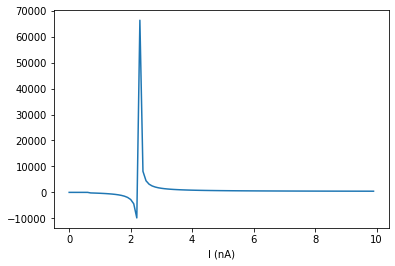

In [47]:
# Part 2

tref = 3e-3 # Refactory time
R = 50e6 # 50 MOhms Membrane Resistance
C = 200e-12 # 200 pF Membrane capacitance
Ve = -70e-3 # -70 mV Equilibrium voltage
Vreset = -80e-3 # -80 mV Hyperpolarization/reset voltage
Vth = -40e-3

def f1(tref, R, C, Ve, Vreset, Vth, I):
    Ith = (Vth - Ve)/R
    if I < Ith:
        return 0
    
    f = 1/(tref-R*C*np.log(1-Vth/(I*R)))
    
    return f

I = np.arange(0, 10e-9, 100e-12)
f_calc = np.zeros(I.shape[0])

for i in range(f_calc.shape[0]):
    f_calc[i] = f1(tref, R, C, Ve, Vreset, Vth, I[i])
    
print(f_calc)
plt.plot(I*1e9,f_calc) # convert to nanoamps
plt.xlabel("I (nA)")

[  0.           0.           0.           0.           0.
   0.           0.          40.04445612  52.37143316  62.52802099
  71.49944328  79.64881594  87.16132353  94.14954253 100.69001046
 106.83888905 112.63967342 118.12739171 123.33108016 128.27533753
 132.98135408 137.46762357 141.75045491 145.8443517  149.76230174
 153.51600308 157.1160441  160.57204955 163.8928006  167.08633503
 170.16003157 173.12068168 175.97455119 178.72743353 181.38469605
 183.95132058 186.43193909 188.83086519 191.15212211 193.39946755
 195.57641599 197.6862586  199.7320812  201.7167804  203.64307824
 205.51353538 207.33056317 209.09643451 210.81329386 212.4831663
 214.10796583 215.68950302 217.22949195 218.72955667 220.19123705
 221.61599427 223.00521578 224.36021997 225.68226045 226.97252999
 228.23216421 229.46224498 230.66380359 231.8378237  232.98524403
 234.10696098 235.20383095 236.27667256 237.32626877 238.35336875
 239.35868972 240.34291863 241.30671378 242.25070627 243.17550138
 244.08167996 244.9

Text(0.5, 0, 'I (nA)')

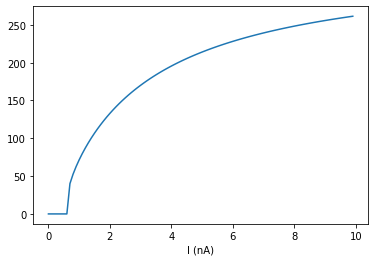

In [48]:
# part 2 with new model
# this takes into account of the reset voltage works better than initial equation

tref = 3e-3 # Refactory time
R = 50e6 # 50 MOhms Membrane Resistance
C = 200e-12 # 200 pF Membrane capacitance
Ve = -70e-3 # -70 mV Equilibrium voltage
Vreset = -80e-3 # -80 mV Hyperpolarization/reset voltage
Vth = -40e-3

def f2(tref, R, C, Ve, Vreset, Vth, I):
    Ith = (Vth - Ve)/R
    if I < Ith:
        return 0
    
    f = 1/(tref + R*C*np.log((I*R+Ve-Vreset)/(I*R+Ve-Vth)))
    
    return f

I = np.arange(0, 10e-9, 100e-12)
f_calc = np.zeros(I.shape[0])

for i in range(f_calc.shape[0]):
    f_calc[i] = f2(tref, R, C, Ve, Vreset, Vth, I[i])
    
print(f_calc)
plt.plot(I*1e9,f_calc) # convert to nanoamps
plt.xlabel("I (nA)")

Text(0.5, 0, 'I (nA)')

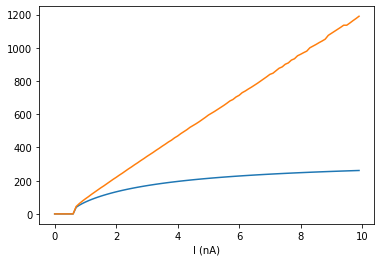

In [49]:
dt = 10e-6
t_max = 1
t = np.arange(0, t_max, dt)

def IF_Spikes(dt, R, C, Ve, Vreset, Vth, Im):
    Vm = np.zeros(t.shape)
    counts = 0 # dividing by dt gives us each time step, each iteartion between i (ever 10 ms) -> number of i cycles we should ahve before doing anything else.
    Vm[0] = Ve
    # Let's figure out dV
    # tref = 3e-3
    # tlast = 0
    for i in range(1, Vm.shape[0]):   #[0] length of it
        dV = dt * (-1/R * (Vm[i-1]-Ve) + Im)/C
        Vm[i] = Vm[i-1] + dV
        # if tlast < tref/dt:
        #     Vm[i] = Vm[i-1] # checking if minimum refactory period has passed
        if Vm[i-1] >= Vth:
            Vm[i] = Vreset
            counts += 1
            # tlast = i
        # plt.plot(Vm)
    return counts

# IF_Spikes(dt, R, C, Ve, Vreset, Vth, 10e-9)

# 
f_sim = np.zeros(I.shape[0])
for i in range(I.shape[0]):
    f_sim[i] = IF_Spikes(dt, R, C, Ve, Vreset, Vth, I[i])

plt.plot(I*1e9, f_calc)
plt.plot(I*1e9, f_sim)
plt.xlabel("I (nA)")

909
909
909


Text(0.5, 0, 'Inter - Spike Period')

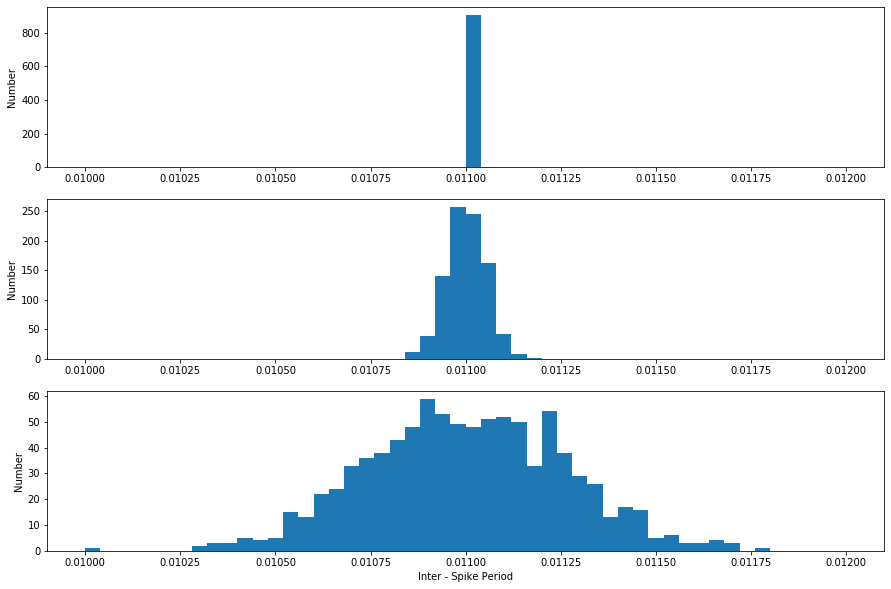

In [57]:
# Part 4
dt = 10e-6
t_max = 10
t = np.arange(0, maxtime, dt)
tref = 3e-3 # Refactory time
R = 50e6 # 50 MOhms Membrane Resistance
C = 200e-12 # 200 pF Membrane capacitance
Ve = -70e-3 # -70 mV Equilibrium voltage
Vreset = -80e-3 # -80 mV Hyperpolarization/reset voltage
Vth = -40e-3

def IF_Spikes_Gauss(dt, R, C, Ve, Vreset, Vth, Isigma):
    Vm = np.zeros(t.shape)
    Imean = 1000e-12
    Inoisy = np.random.normal(Imean, Isigma, (t.shape[0], 1))
    counts = 0
    Vm[0] = Ve 
    #Let's figure out d
    spikes = []
    last_spike_idx = 0    
    for i in range(1, Vm.shape[0]):
        dV = dt* (-1/R * (Vm[i-1]-Ve) + Inoisy[i])/C
        Vm[i] = Vm[i-1] + dV
        
        if Vm[i-1] >= Vth:
            Vm[i] = Vreset
            spikes.append((i-last_spike_idx)*dt) # times dt to get actual time in ms
            last_spike_idx = i
            
    return np.asarray(spikes) # inter-spike periods
    
Im = np.asarray([0, 100e-12, 500e-12])

plt.figure(1, figsize=(15,10))

for I in range(Im.shape[0]):
    plt.subplot(3, 1, I+1)
    spikecounts = IF_Spikes_Gauss(dt, R, C, Ve, Vreset, Vth, Im[I])
    print(spikecounts.shape[0])
    plt.hist(spikecounts, bins=50, range=(0.010, 0.012))
    # plt.title("I=" + str(Im[I]*1e9) + "nA")
    plt.ylabel("Number")

plt.xlabel("Inter - Spike Period")
    

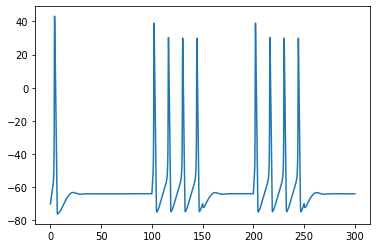

In [104]:
from scipy.integrate import odeint

# Question 3b (Hodgkin-Huxley Model)
# alphan = lambda Vm: 0.01*(10-Vm)/(np.exp((10-Vm/10))-1)
# alpham = lambda Vm: 0.1*(25-Vm)/(np.exp((25-Vm/10))-1)
# alphah = lambda Vm: 0.07*np.exp(-Vm/20)
# 
# betan = lambda Vm: 0.125*np.exp(-Vm/80)
# betam = lambda Vm: 4.0*np.exp(-Vm/18)
# betah = lambda Vm: 1.0/(np.exp(30-Vm/10)+1)

# alphan = lambda Vm: 0.01*(Vm+55)/(1-np.exp((Vm + 55/10)))
# alpham = lambda Vm: 0.1*(Vm+40)/(1-np.exp((Vm + 40))/10)
# alphah = lambda Vm: 0.07*np.exp(-Vm/20)
# 
# betan = lambda Vm: 0.125*np.exp(-(Vm+65)/80)
# betam = lambda Vm: 4.0*np.exp(-(Vm+65)/18)
# betah = lambda Vm: 1.0/(1+ np.exp(-(Vm+35)/10))

# alphan = lambda Vm: 0.02*(Vm-25)/(1-np.exp((Vm-25/9)))
# alpham = lambda Vm: 0.182*(Vm+35)/(1-np.exp((Vm+35/9)))
# alphah = lambda Vm: 0.25*np.exp(-(Vm+90)/20)
# 
# betan = lambda Vm: -0.02*(Vm-25)*(1-np.exp(Vm-25/9))
# betam = lambda Vm: -0.124*(Vm+25)*(1-np.exp(Vm+35/9))
# betah = lambda Vm: 0.25*(np.exp((Vm+62)/6)/np.exp((Vm+90)/12))

alphan = lambda Vm:0.01*(Vm+55)/(1-np.exp(-(Vm+55)/10))
alpham = lambda Vm: 0.1*(Vm+40)/(1-np.exp(-(Vm+40)/10))
alphah = lambda Vm: 0.07*np.exp(-(Vm+65)/20)

betan = lambda Vm: 0.125*np.exp(-(Vm+65)/80)
betam = lambda Vm: 4*np.exp(-(Vm+65)/18)
betah = lambda Vm: 1/(1+np.exp(-(Vm+35)/10))

# Set up constants
# Cm = 200e-12
# Cm = 1e-6
# gk = 36e-3
# gna = 120e-3
# gl = 0.3e-3
# Vna = 50e-3
# Vk = -77e-3
# Vl = -50e-3
# Ve = -70e-3

Cm = 1
gk = 36
gna = 120
gl = 0.3
Vna = 50
Vk = -77
Vl = -50
Ve = -70

#time step in ms
# I = Cdv/dt + Ik + Ina + Il

# dV/dt = 1/C * (I- (Ik + Ina + Il))
Ik = lambda gk, n, Vm, Vk: gk*n**4*(Vm-Vk)
Ina = lambda gna, m, h, Vm, Vna: gna*m**3*h*(Vm-Vna)
Igl = lambda gl, Vm, Vl: gl*(Vm-Vl)

m_inf = alpham(Ve)/(alpham(Ve)+betam(Ve))
h_inf = alphah(Ve)/(alphah(Ve)+betah(Ve))
n_inf = alphan(Ve)/(alphan(Ve)+betan(Ve))
# m_inf = 1 + alpham(Ve)/betam(Ve)
# h_inf = 1 + alphah(Ve)/betah(Ve)
# n_inf = 1 + alphan(Ve)/betan(Ve)

dt = 1e-3
t = np.arange(0,300,dt)

def Vm_eq(X, t):
    Vm, m, h, n = X
    I = 10*((t>100) - (t>150) + (t > 200) - (t>250))
    dVdt = 1/Cm * (I-Ik(gk, n, Vm, Vk) - Ina(gna, m, h, Vm, Vna) - Igl(gl, Vm, Vl))
    dndt = alphan(Vm)*(1-n)-betan(Vm)*n
    dmdt = alpham(Vm)*(1-m)-betam(Vm)*m
    dhdt = alphah(Vm)*(1-h)-betah(Vm)*h
    return dVdt, dmdt, dhdt, dndt

def HH(t):
    # X sets eqn variable, define init Vm, m, h, n
    X = odeint(Vm_eq,  [Ve,  m_inf, h_inf, n_inf], t)
    V = X[:,0]
    return V

plt.plot(t, HH(t))
